# Analyzing Model Performance in Online Sales from India: A Case Study on Amazon's 2022 Sales Report

This paper emphasizes the use of modeling techniques suitable for analyzing eCommerce data, which primarily consists of categorical variables. Initially, we conducted exploratory data analysis (EDA) on the dataset without transformation. Subsequently, we applied EDA to the dataset after performing dummy variable transformations. The dataset, sourced from Kaggle, is titled 'Amazon Sales Report' and pertains to online sales from India. The primary objective of this study is to recommend the most suitable modeling technique for such data. Specifically, we aim to compare two models: linear regression and logistic regression. In the linear regression model, 'Amount' serves as the dependent variable, predicted by variables such as Qty, Fulfilment, ship-postal-code, and category. Conversely, in the logistic regression model, the binary dependent variable 'FulfilmentB' is predicted by Qty, Amount, ship-postal-code, and category.

In [38]:
# load the data
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from io import StringIO  
from IPython.display import Image  
import pydotplus
import pydot
from sklearn.tree import plot_tree, export_text
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve
from sklearn import utils
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from joblib import *
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
fig = plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

In [39]:
# Upload the data
data11 = pd.read_csv('AmazonSales1.csv',low_memory=False)

In [19]:
data11.head()

,index,Date,Status,FulfilmentB,Fulfilment,Fulfilment_dum,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country,fulfilled-by
0,4,4/30/2022,Shipped,Merchant,Amazon,1,Top,3XL,1,INR,574.0,CHENNAI,600073.0,IN,NaN
1,8,4/30/2022,Cancelled,Merchant,Amazon,1,Set,3XL,0,NaN,NaN,HYDERABAD,500008.0,IN,NaN
2,20,4/30/2022,Shipped,Amazon,Amazon,1,kurta,3XL,1,INR,517.0,TIRUCHIRAPPALLI,620018.0,IN,NaN
3,41,4/30/2022,Shipped,Merchant,Amazon,1,Western Dress,3XL,1,INR,885.0,JABALPUR,482002.0,IN,NaN
4,69,4/30/2022,Shipped,Amazon,Amazon,1,Set,3XL,1,INR,1146.0,VIJAPURA,586201.0,IN,NaN


In [4]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             128975 non-null  int64  
 1   Date              128975 non-null  object 
 2   Status            128975 non-null  object 
 3   FulfilmentB       128975 non-null  object 
 4   Fulfilment        128975 non-null  object 
 5   Fulfilment_dum    128975 non-null  int64  
 6   Category          128975 non-null  object 
 7   Size              128975 non-null  object 
 8   Qty               128975 non-null  int64  
 9   currency          121180 non-null  object 
 10  Amount            121180 non-null  float64
 11  ship-city         128942 non-null  object 
 12  ship-postal-code  128942 non-null  float64
 13  ship-country      128942 non-null  object 
 14  fulfilled-by      39277 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 14.8+ MB


In [5]:
data11.dtypes

index                 int64
Date                 object
Status               object
FulfilmentB          object
Fulfilment           object
Fulfilment_dum        int64
Category             object
Size                 object
Qty                   int64
currency             object
Amount              float64
ship-city            object
ship-postal-code    float64
ship-country         object
fulfilled-by         object
dtype: object

In [6]:
data11.isnull().sum()

index                   0
Date                    0
Status                  0
FulfilmentB             0
Fulfilment              0
Fulfilment_dum          0
Category                0
Size                    0
Qty                     0
currency             7795
Amount               7795
ship-city              33
ship-postal-code       33
ship-country           33
fulfilled-by        89698
dtype: int64

In [40]:
data11 = data11.dropna()
data11.head()

,index,Date,Status,FulfilmentB,Fulfilment,Fulfilment_dum,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country,fulfilled-by
89698,1,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,406.0,BENGALURU,560085.0,IN,Easy Ship
89699,26,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,299.0,BILASPUR,495001.0,IN,Easy Ship
89701,85,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,Bottom,3XL,1,INR,377.0,KOLKATA,700078.0,IN,Easy Ship
89702,92,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,725.0,CHENNAI,600028.0,IN,Easy Ship
89703,129,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,579.0,BENGALURU,560055.0,IN,Easy Ship


In [21]:
# Print the categorical columns and their associated levels.
dfo = data11.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,Date,91
1,Status,11
2,FulfilmentB,2
3,Fulfilment,1
4,Category,8
5,Size,11
6,currency,1
7,ship-city,4702
8,ship-country,1
9,fulfilled-by,1


In [22]:
#Descriptive statistics for the numerical variables
#df = pd.DataFrame([[1,2,3,4]], columns=['a', 'b', 'v', 'w'])
dd=pd.DataFrame(data11,columns=['index','Qty','Amount','ship-postal-code']).describe()
dd

,index,Qty,Amount,ship-postal-code
count,37528.000000,37528.000000,37528.000000,37528.000000
mean,60932.856401,0.867406,646.523191,463355.001359
std,36853.971158,0.354206,279.995058,194518.859123
min,0.000000,0.000000,0.000000,110001.000000
25%,27192.750000,1.000000,458.000000,380001.000000
50%,63448.500000,1.000000,629.000000,500019.000000
75%,91786.250000,1.000000,771.000000,600042.000000
max,128891.000000,5.000000,5495.000000,989898.000000


                   Exploratory Analysis with variables not being transformed in dummies

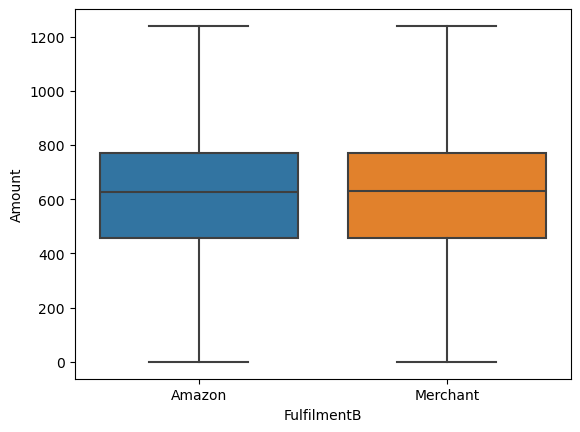

In [8]:
# Make a boxplot with FulfilmentB as x and Amount as y, with FulfilmentB not being transformed to Amazon=1 and Merchant=0
_ = sns.boxplot(x='FulfilmentB', y='Amount', data=data11, showfliers= False)

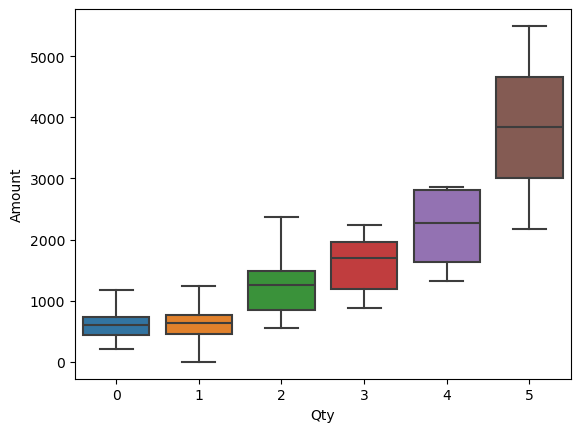

In [9]:
# Make a boxplot  with Qty as x and Amount as Y
_ = sns.boxplot(x='Qty', y='Amount', data=data11, showfliers=False )

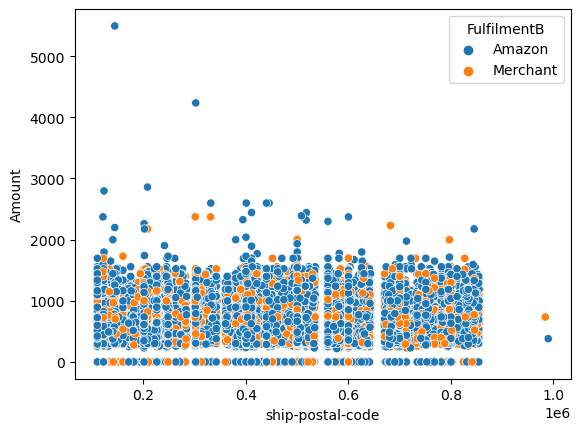

In [24]:
# Make a scatterplot with ship-postal-code as x, Amount as y with regards to FulfilmentB
_ = sns.scatterplot(x='ship-postal-code', y='Amount', data=data11, hue='FulfilmentB')


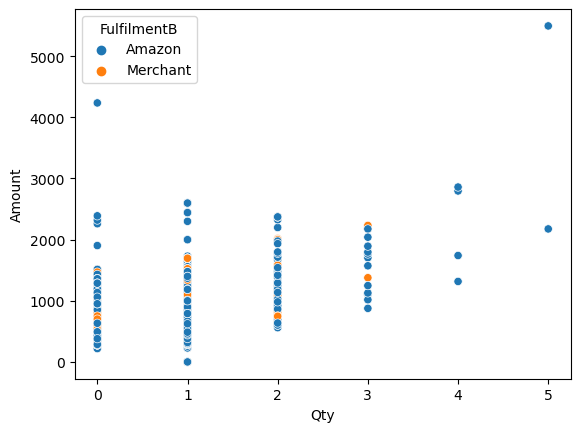

In [18]:
# Make a scatterplot with Qty as x, Amount as Y with regards to FulfilmentB 
_ = sns.scatterplot(x='Qty', y='Amount', data=data11, hue='FulfilmentB')

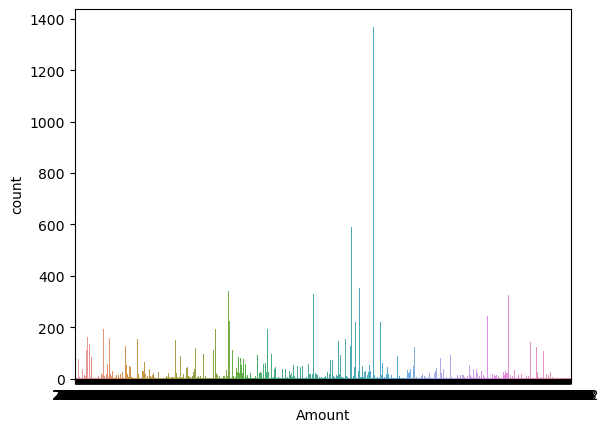

In [15]:
ax=sns.countplot(x='Amount' ,data=data11)

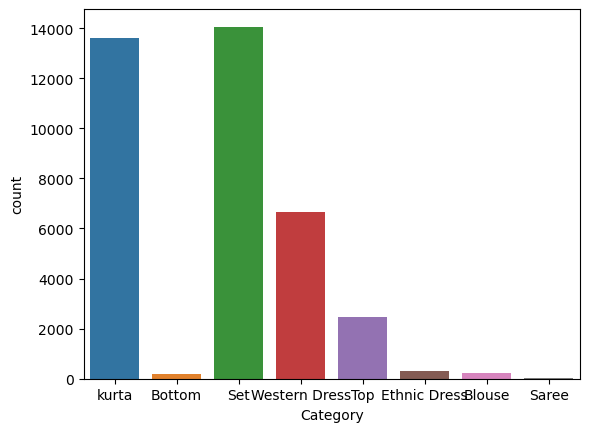

In [16]:
ax=sns.countplot(x='Category' , data=data11)

# Lets create the dummies variables


In [41]:
# First let's dropped the unsued variable
data11.drop(['Date','Fulfilment','Fulfilment_dum','currency','ship-city','ship-country','fulfilled-by'], axis=1, inplace=True)
data11.head()

,index,Status,FulfilmentB,Category,Size,Qty,Amount,ship-postal-code
89698,1,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,406.0,560085.0
89699,26,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,299.0,495001.0
89701,85,Shipped - Delivered to Buyer,Amazon,Bottom,3XL,1,377.0,700078.0
89702,92,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,725.0,600028.0
89703,129,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,579.0,560055.0


In [42]:
# Check out the column names
data11.columns

Index(['index', 'Status', 'FulfilmentB', 'Category', 'Size', 'Qty', 'Amount',
       'ship-postal-code'],
      dtype='object')

In [21]:
#Check for duplicated rows
duplicateRowsDF = data11[data11.duplicated()]
duplicateRowsDF

,index,Status,FulfilmentB,Category,Size,Qty,Amount,ship-postal-code


In [43]:
# 2nd, check the level for the remaining variables
# Print the categorical columns and their associated levels after dropping the unused variables.
dfo1 = data11.select_dtypes(include=['object'], exclude=['datetime'])
dfo1.shape
#get levels for all variables
vvn = pd.DataFrame(dfo1.nunique()).reset_index()
vvn.columns = ['VarName', 'LevelsCount']
vvn.sort_values(by='LevelsCount', ascending =False)
vvn

,VarName,LevelsCount
0,Status,11
1,FulfilmentB,2
2,Category,8
3,Size,11


In [44]:
# 3rd, replaced the content of the variable FulfilmentB: Amazon to 1 and FulfilmentB: Merchant to 0
# Replace Fulfilment "Amazon and Merchant"  by 1 and 0
data11.loc[data11['FulfilmentB'] == 'Amazon','FulfilmentB'] =   1
data11.loc[data11['FulfilmentB'] == 'Merchant', 'FulfilmentB'] = 0
data11.head()

,index,Status,FulfilmentB,Category,Size,Qty,Amount,ship-postal-code
89698,1,Shipped - Delivered to Buyer,1,kurta,3XL,1,406.0,560085.0
89699,26,Shipped - Delivered to Buyer,1,kurta,3XL,1,299.0,495001.0
89701,85,Shipped - Delivered to Buyer,1,Bottom,3XL,1,377.0,700078.0
89702,92,Shipped - Delivered to Buyer,1,kurta,3XL,1,725.0,600028.0
89703,129,Shipped - Delivered to Buyer,1,kurta,3XL,1,579.0,560055.0


In [45]:
# Create dummies features for the categorical variables.
#features=['Status','Category','Size']
#dummies=pd.get_dummies(data22[features])
#merged=pd.concat([data22,dummies],axis=1)
#final=merged.drop(['Status','Category','Size'], axis=1)

features = ['Status', 'Category', 'Size']
dummies = pd.get_dummies(data11[features], dtype=int)
merged = pd.concat([data11, dummies], axis=1)
final2 = merged.drop(['Status', 'Category', 'Size'], axis=1)
data11 = final2
data11.head()

,index,FulfilmentB,Qty,Amount,ship-postal-code,Status_Cancelled,Status_Pending,Status_Pending - Waiting for Pick Up,Status_Shipped - Damaged,Status_Shipped - Delivered to Buyer,...,Size_4XL,Size_5XL,Size_6XL,Size_Free,Size_L,Size_M,Size_S,Size_XL,Size_XS,Size_XXL
89698,1,1,1,406.0,560085.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89699,26,1,1,299.0,495001.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89701,85,1,1,377.0,700078.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89702,92,1,1,725.0,600028.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89703,129,1,1,579.0,560055.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


                               #Data Exploration with the dummies variables

In [46]:
# Lets convert the variables FulfilmentB to numerical for testing purposes
data11['FulfilmentB'] = pd.to_numeric(data11['FulfilmentB'])

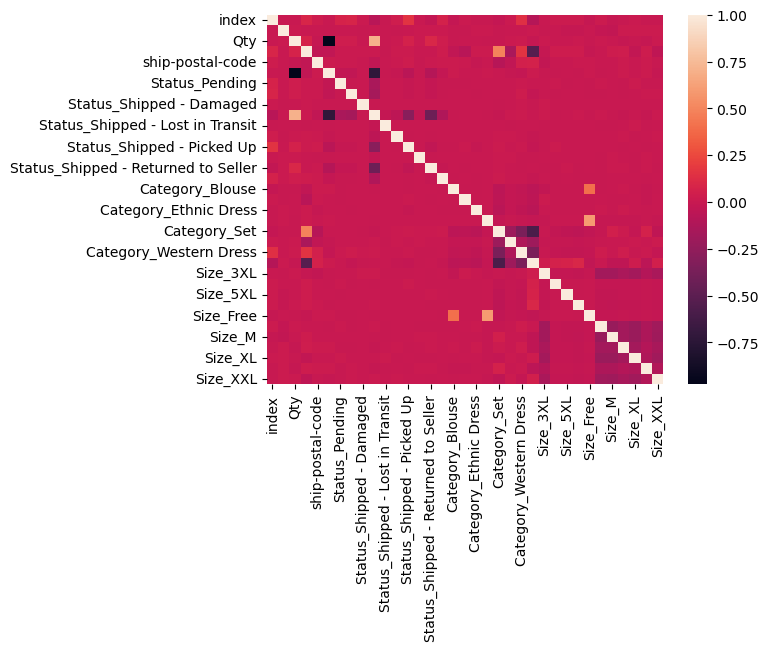

In [27]:
# Make a heatmap of the data with the  created dummies variables 
correlation_matrix = data11.corr()
_ = sns.heatmap(correlation_matrix)

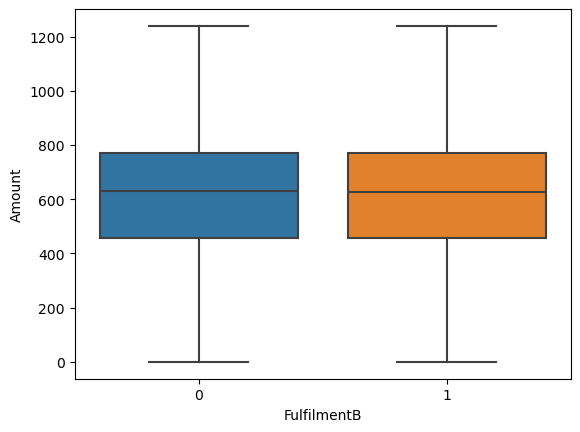

In [31]:
# Making a scatter plot for FulfilmentB after being transformed to Amazon=1 and Merchant=0
_ = sns.boxplot(x='FulfilmentB', y='Amount', data=data11, showfliers=False)

 # Modeling
 
 In this section, our primary objective is to conduct the test analysis for the final document.
 As data preparation has already been completed in the previous assignment, we will focus less on this aspect.
 However, it's important to note that the data and key features will be uploaded to facilitate the assignment process smoothly. 
 This allows us to delve directly into the analysis phase, ensuring a comprehensive and insightful final document.
  


  # Modeling with multiple linear regression 

In [47]:

# Create test and train datasets
X = data11.drop(['Amount'], axis=1)
y = data11['Amount']

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
y=y.astype('int')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
# Create and fit the model
rmodel3 = sm.OLS(y.astype(float), X.astype(int)).fit()


In [49]:
# model summary
rmodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Amount   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     877.3
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:30:06   Log-Likelihood:            -2.5448e+05
No. Observations:               37528   AIC:                         5.090e+05
Df Residuals:                   37496   BIC:                         5.093e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   99.3924     20.653      4.813      0.000      58.912     139.872
index                                    0.0003   3.09e-05     10.556      0.000       0.000       0.000
FulfilmentB                              6.2069      2.502      2.481      0.013       1.303      11.111
Qty                                    615.3902     13.948     44.119      0.000     588.051     642.729
ship-postal-code                      6.131e-07    5.7e-06      0.107      0.914   -1.06e-05    1.18e-05
Status_Cancelled                       533.7673     24.156     22.097      0.000     486.421     581.114
Status_Pending                         -64.7503     24.405     -2.653      0.008    -112.584     -16.917
Status_Pending - Waiting for Pick Up   -68.5259     23.971     -2.859      0.004    -115.510     -21.542
Status_Shipped - Damaged               326.3464    195.551      1.669      0.095     -56.939     709.632
Status_Shipped - Delivered to Buyer    -59.7707     21.000     -2.846      0.004    -100.931     -18.610
Status_Shipped - Lost in Transit      -306.4100     89.441     -3.426      0.001    -481.717    -131.103
Status_Shipped - Out for Delivery       -8.9961     38.992     -0.231      0.818     -85.421      67.429
Status_Shipped - Picked Up             -61.0190     21.885     -2.788      0.005    -103.914     -18.124
Status_Shipped - Rejected by Buyer     -82.6107     62.258     -1.327      0.185    -204.639      39.417
Status_Shipped - Returned to Seller    -61.5143     21.439     -2.869      0.004    -103.535     -19.494
Status_Shipped - Returning to Seller   -47.1243     26.516     -1.777      0.076     -99.097       4.848
Category_Blouse                        -67.3298     14.087     -4.779      0.000     -94.942     -39.718
Category_Bottom                       -279.1396     15.790    -17.678      0.000    -310.089    -248.190
Category_Ethnic Dress                   81.7258     13.266      6.161      0.000      55.725     107.727
Category_Saree                         348.5871     44.010      7.921      0.000     262.326     434.848
Category_Set                           203.2229      7.716     26.337      0.000     188.099     218.347
Category_Top                          -126.7555      8.449    -15.002      0.000    -143.317    -110.194
Category_Western Dress                 116.9812      7.922     14.767      0.000     101.454     132.509
Category_kurta                        -177.8998      7.731    -23.011      0.000    -193.053    -162.747
Size_3XL                               -55.9412      5.428    -10.307      0.000     -66.579     -45.303
Size_4XL                               242.5084     19.650     12.341      0.000     203.994     281.023
Size_5XL                              

The R-squared coefficient above indicates that the model has poorly predicted the variation in the dataset, with an R-squared of 42%, suggesting that more work is needed to improve its predictive power. However, the model exhibits acceptable independence of errors, as indicated by a Durbin-Watson statistic of 1.92. 

In [50]:
# Use our new model to make predictions
y_pred = rmodel3.predict(X_test)

Text(0, 0.5, 'Predicted Amount')

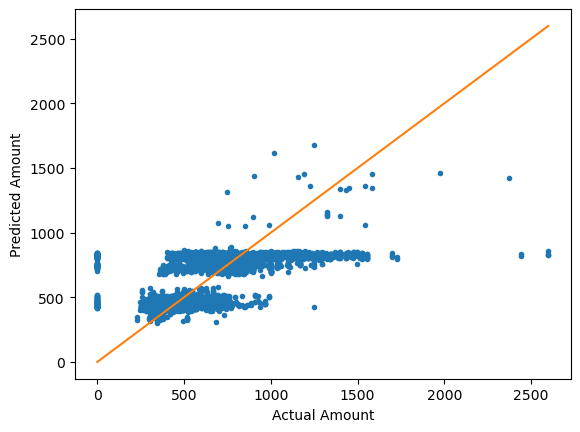

In [51]:
# Plot the predictions
# Build a scatterplot
plt.plot(y_test, y_pred, marker='.', linestyle='none')

# Add a line for perfect correlation
test_range = [min(y_test), max(y_test)]
plt.plot(test_range, test_range)

# Label it nicely
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')

Base on this graph, multi linear model appears not to be a good fit for the data. Now, Let's check the data using a Logistic Regression model

# Modeling with Logistic Regression



In [52]:
# Train/Split the data
X = data11.drop(['FulfilmentB'], axis=1)
y = data11['FulfilmentB']

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)

# Train/Slpit the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, test_size =.2, random_state = 1)
print('Training split has ', Xlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ylr))+ ')')
print('Test split has ', Xtestlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ytestlr)) + ')')

Training split has  30022  rows
 and the corresponding labels have an equal number of values. (30022)
Test split has  7506  rows
 and the corresponding labels have an equal number of values. (7506)


In [53]:
# lbfgs
# newton-cg
clf = LogisticRegression(solver = 'lbfgs', max_iter = 500)
#y_pred_proba = model.predict_proba(X_test)[:, 1]

In [55]:
model=clf.fit(Xlr, ylr) 
#y_pred_prob1 = model.predict_proba(Xtestlr)

In [56]:
y_predict_test = clf.predict(Xtestlr)
y_predict_training = clf.predict(Xlr)
y_pred_prob1 = model.predict_proba(Xtestlr)
print("[Test] Accuracy score: (ytestlrstrat, y_predict_test) [**note reversed order]", 
      f'{accuracy_score(ytestlr, y_predict_test):.2f}')

print("[Test] Accuracy score (y_predict_test, ytestlrstrat):",
      f'{accuracy_score(y_predict_test, ytestlr):.2f}')
print("[Training] Accuracy score: (ylrstrat, y_predict_training)", 
      f'{accuracy_score(ylr, y_predict_training):.2f}')

[Test] Accuracy score: (ytestlrstrat, y_predict_test) [**note reversed order] 0.73
[Test] Accuracy score (y_predict_test, ytestlrstrat): 0.73
[Training] Accuracy score: (ylrstrat, y_predict_training) 0.74


In [201]:
# Let's check for R^2
rr = model.score(Xlr,ylr)
rr
#

0.7370594897075478

The Logistic Regression model achieves an impressive R-squared of 73.57%, marking a substantial improvement over the previous model. To thoroughly assess its predictive accuracy, we will scrutinize the model's predictions using a confusion matrix.

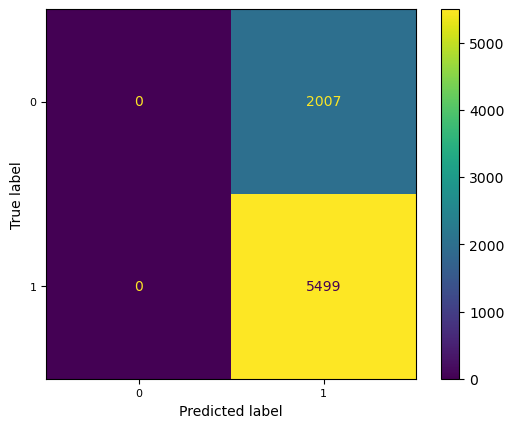

In [57]:
# Making the confusion matrix for the Logistic Regression Model
from sklearn.metrics import ConfusionMatrixDisplay
cm= confusion_matrix(ytestlr, y_predict_test, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = [0, 1])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = [1, 0], fontsize = 8)
ax.set_yticklabels(labels = [0, 1], fontsize = 8)
display_cm.plot(ax = ax)

The confusion matrix reveals that for the class FulfilmentB: Amazon = 1:

True Positive: 6907 out of 9382 predictions, which corresponds to %74
While for the class FulfilmentB: Merchant = 0 %.

False Negative: 2475 out of 9382 predictions, which accounts for 26%.
However, there were no instances of True Negative or False Positive predictions recorded in the matrix, both totaling 0 out o predicted8 ped.rBased on the imbalance revealed in the confusion matrix, where there are no True Negatives or False Positives, there isn't enough evidence to conclusively determine that it is the best fit for the data. Further testing is necessary before determining its significance relative to the previousonable. Now, let's proceed to evaluate the dataseg t usinRandom  .ions.

 # Modeling with Random Forest 

In [71]:

from sklearn.model_selection import train_test_split
#df.to_numpy()
# dont forget to define your X and y
X= data11.drop(['FulfilmentB'],axis=1)
y=data11['FulfilmentB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
#y=y.astype('int')
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [72]:
#Create dummy variables to deal with categorical inputs
# One-hot encode all features in X.
X_train = pd.get_dummies(X_train)
#X_train = X_train.as_matrix()
# Do the same, but for X_test
X_test = pd.get_dummies(X_test) 
#X_test = X_test.as_matrix()

In [73]:
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [78]:
#Fit Random Forest Classifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
#model_res = clf.fit(X_train_scaled, y_train)
model_res = clf.fit(X_train_scaled, y_train)
y_pred1 = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Random Forest: Accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))


Random Forest: Accuracy=0.733
Random Forest: f1-score=0.846


In [79]:
# Plug in appropriate max_depth and random_state parameters 
RFModel = RandomForestClassifier(max_depth=3, random_state=1234)

# Model and fit
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
print('Random Forest model - max depth 3')
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Random Forest model - max depth 3
Accuracy: 0.7326139088729017
Balanced accuracy: 0.5
Precision score 0.7326139088729017
Recall score 0.0


In [80]:
# Let's check for R^2

r_squared = model_res.score(X_train_scaled, y_train)
print(r_squared)

# R^2 with maxi depth 3
rsquared=RFModel.score(X_train, y_train) 
print(rsquared)

1.0
0.7370594897075478


Despite the drop in R-squared from 100% to 73.70% when limiting the maximum depth to 3, the Random Forest model still demonstrates a significant improvement compared to the Logistic Regression model. Now, let's examine the accuracy of the Random Forest model by examining its predictions through a confusion matrix.

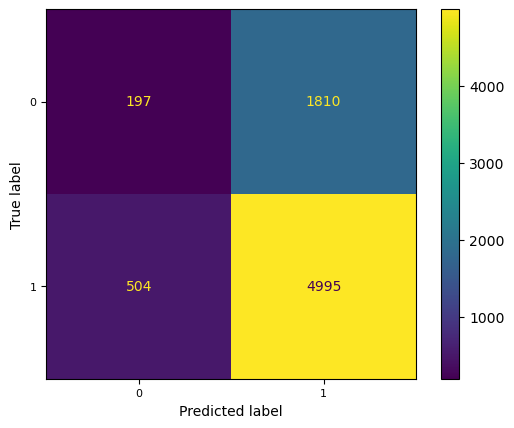

In [81]:
# Let's create the confusion matrix without max depht 3

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred1, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = [0, 1])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = [1, 0], fontsize = 8)
ax.set_yticklabels(labels = [0, 1], fontsize = 8)
display_cm.plot(ax = ax)

The results from this confusion matrix indicate a noticeable improvement in the model's classification compared to the Logistic Regression model. The confusion matrix from the Random Forest demonstrates a clearer understanding of the data's classification. Unlike the Logistic Regression model, which showed an unbalanced confusion matrix, this model shows a more balanced and accurate classification. For example, the confusion matrix reveals that for the class FulfilmentB: Amazon = 1:

- True Positi 499507 o of  80582 predictions, which corresponds  7to3%
- False Negative: 1048 out o680550 predictions, which corresponds to 274

While for the class FulfilmentB: Merchant 0 %- .True se Negate 19775 ou701 2 predictions, which accountfor 28% 2
- False Positive50459 out o70156 predictions, which accounts fo722le. Now, let's proceed to evaluate the dataset using the Decision Tr.s.

# Modeling with Decition Tree

In [82]:
# NoPrediction will contain all known values for FulfilmentB
# Call dropna() on FulfilmentB, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after calling dropna() on FulfilmentB
NoPrediction = data11.dropna()
NoPrediction['FulfilmentB'].describe().T

count    37528.000000
mean         0.736170
std          0.440714
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: FulfilmentB, dtype: float64

In [124]:
#Get the subset of Amazon Sales data with null values in the FulfilmentB column, and save that subset as Prediction
# Get just those rows whose value for the Decision column is null  
Prediction = data11[data11['FulfilmentB'].isnull()]


In [125]:
# Check the names of the columns of NOPrediction
NoPrediction.columns

Index(['index', 'FulfilmentB', 'Qty', 'Amount', 'ship-postal-code',
       'Status_Cancelled', 'Status_Pending',
       'Status_Pending - Waiting for Pick Up', 'Status_Shipped - Damaged',
       'Status_Shipped - Delivered to Buyer',
       'Status_Shipped - Lost in Transit', 'Status_Shipped - Out for Delivery',
       'Status_Shipped - Picked Up', 'Status_Shipped - Rejected by Buyer',
       'Status_Shipped - Returned to Seller',
       'Status_Shipped - Returning to Seller', 'Category_Blouse',
       'Category_Bottom', 'Category_Ethnic Dress', 'Category_Saree',
       'Category_Set', 'Category_Top', 'Category_Western Dress',
       'Category_kurta', 'Size_3XL', 'Size_4XL', 'Size_5XL', 'Size_6XL',
       'Size_Free', 'Size_L', 'Size_M', 'Size_S', 'Size_XL', 'Size_XS',
       'Size_XXL'],
      dtype='object')

In [83]:
# Let's do our feature selection.
# Make a variable called 'features', and a list containing the strings of every column except "FulfilmentB"
features = [column for column in NoPrediction.columns if column != 'FulfilmentB']

# Make an explanatory variable called X, and assign it: NoPrediction[features]
X = NoPrediction[features] 

# Make a dependent variable called y, and assign it: NoPrediction.Decision
y = NoPrediction['FulfilmentB']

# # Modeling using entropy

In [89]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
#entr_model = tree.DecisionTreeClassifier(criterion='entropy', random_state=1234)
entr_model = tree.DecisionTreeClassifier(criterion='entropy', random_state=1234)
# Call fit() on entr_model
aa=entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred11 = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred11 = pd.Series(y_pred1)


# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [85]:
#Model 1: Entropy model - no max_depth: Interpretation and evaluation
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for 1' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score for 1' , metrics.recall_score(y_test,y_pred, pos_label = 1))


Model Entropy - no max depth
Accuracy: 0.7326139088729017
Balanced accuracy: 0.5
Precision score for 1 0.7326139088729017
Recall score for 1 1.0



# # Modeling using Gini impurity model with no max depth

In [90]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model =  tree.DecisionTreeClassifier(criterion='gini', random_state=1234)

# Call fit() on the gini_model as you did with the entr_model
bb=gini_model.fit(X_train, y_train) 

# Call predict() on the gini_model as you did with the entr_model 
y_pred12 = gini_model.predict(X_test) 

# Turn y_pred into a series, as before
y_pred12 = pd.Series(y_pred2)

# Check out gini_model
gini_model

DecisionTreeClassifier(random_state=1234)

In [163]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Gini impurity model
Accuracy: 0.7326139088729017
Balanced accuracy: 0.5
Precision score 0.7326139088729017
Recall score 0.0


In [ ]:
The accuracy  haas slightly decreased

# # Modeling with Entropy model - max depth 3

In [91]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 

entr_model2 = tree.DecisionTreeClassifier(criterion='entropy', random_state=1234, max_depth=3)

cc=entr_model2.fit(X_train, y_train)
y_pred13 = entr_model2.predict(X_test)

y_pred13 = pd.Series(y_pred3)

entr_model2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)

In [174]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for 1 ' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score for 0' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy model max depth 3
Accuracy: 0.7326139088729017
Balanced accuracy: 0.5
Precision score for 1  0.7326139088729017
Recall score for 0 0.0


In [ ]:
Big improvement has been observed from the accuracy (0.7340)

## Modeling with Gini impurity with max depth 3

In [92]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion ='gini', random_state=1234, max_depth=3)

# Do the fit, predict, and series transformations as before. 
dd=gini_model2.fit(X_train, y_train)

y_pred14 = gini_model2.predict(X_test)
y_pred14 = pd.Series(y_pred4)

gini_model2

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [176]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1 ))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Gini impurity  model - max depth 3
Accuracy: 0.7326139088729017
Balanced accuracy: 0.5
Precision score 0.7326139088729017
Recall score 0.0


In [ ]:
The accuracy remained the same ( 0.7340)

In [93]:
# Let's find the th R^2 for the four Decision Tree models.

rr1= aa.score(X_train, y_train)
rr2 = bb.score(X_train, y_train)
rr3 = cc.score(X_train, y_train)
rr4 = dd.score(X_train, y_train)
print(rr1)
print(rr2)
print(rr3)
print(rr4)

1.0
1.0
0.7370594897075478
0.7370594897075478


The R-squared values for the four models did not indicate any improvement compared to the Random Forest model, as their values were similar. At this juncture, it is essential to verify the equality of these potential results between these two models by assessing their confusion matrices. Let's proceed to examine the confusion matrix for further insights.

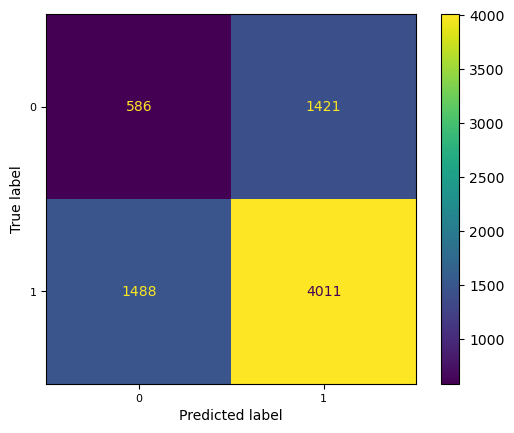

In [94]:
# Let's create the confusion matrix for Entropy without max depht 3

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred11, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = [0, 1])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = [1, 0], fontsize = 8)
ax.set_yticklabels(labels = [0, 1], fontsize = 8)
display_cm.plot(ax = ax)

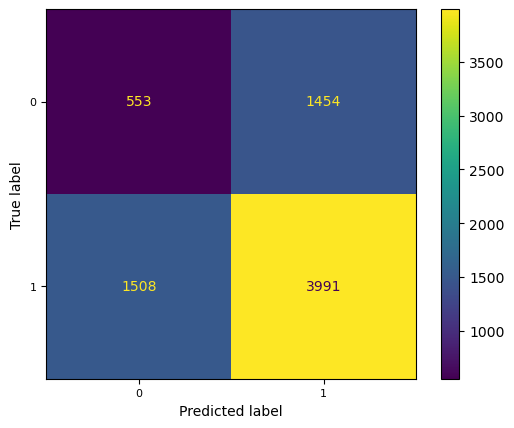

In [95]:
# Let's create the confusion matrix with Gini- no max depth 3

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred12, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = [0, 1])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = [1, 0], fontsize = 8)
ax.set_yticklabels(labels = [0, 1], fontsize = 8)
display_cm.plot(ax = ax)

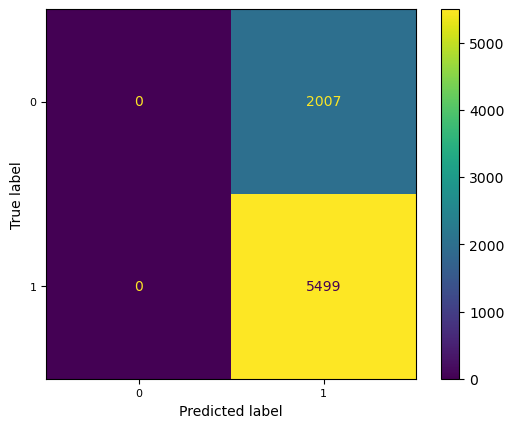

In [96]:
# Let's create the confusion matrix entropy with max depht 3

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred13, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = [0, 1])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = [1, 0], fontsize = 8)
ax.set_yticklabels(labels = [0, 1], fontsize = 8)
display_cm.plot(ax = ax)

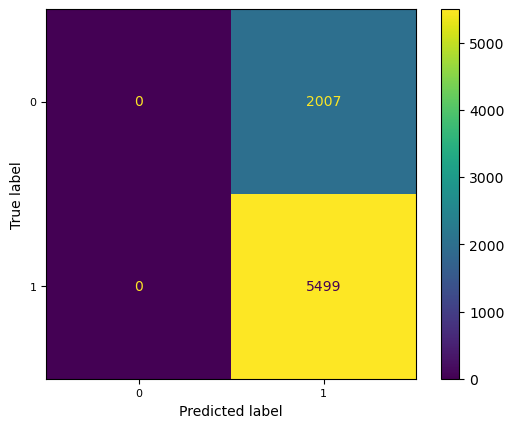

In [97]:
# Let's create the confusion matrix Gini with max depht 3

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred14, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = [0, 1])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = [1, 0], fontsize = 8)
ax.set_yticklabels(labels = [0, 1], fontsize = 8)
display_cm.plot(ax = ax)


The results from the Decision Tree model are quite similar to those from the Random Forest, except when using entropy and Gini with a depth of 3, where they yield results similar to the Logistic Regression in terms of unbalanced predictions. Thus far, both the Random Forest and the Decision Tree (using entropy and Gini) seem to be suitable for the data. To determine which model is more advantageous for decision-making, further analysis of their ROC scores is required.

In [208]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [214]:
# Train a logistic regression model for ROC 
model22 = LogisticRegression() 
model22.fit(Xlr, ylr)
# Predict probabilities on the test set
y_pred_proba = model22.predict_proba(Xtestlr)[:, 1]

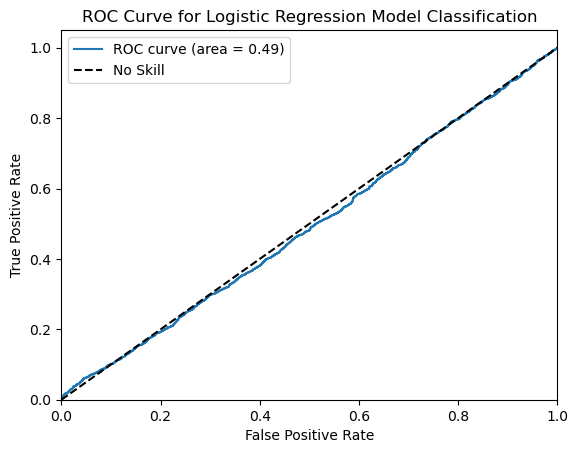

In [215]:
# Calculate ROC curve for Logistic Regression Model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model Classification')
plt.legend()
plt.show()

In [234]:
# Train a Random Forest model for ROC 

#model23 = RandomForestClassifier() 
model23 = clf.fit(X_train_scaled, y_train)
# Predict probabilities on the test set
#y_pred_prob = model_res.predict_proba(X_test_scaled)
y_pred_proba1 = model23.predict_proba(X_test_scaled)[:,1]

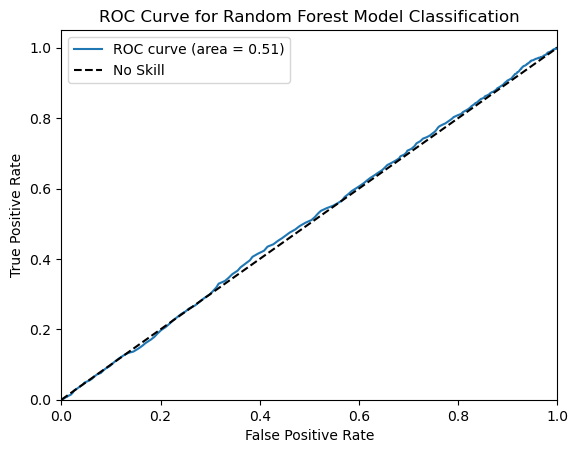

In [238]:
# Calculate ROC curve for Random Forest Model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba1) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model Classification')
plt.legend()
plt.show()

In [98]:
# Train a Decition Tree (Antropy) with no max depht 3 
model24=entr_model2.fit(X_train, y_train)
# Predict probabilities on the test set
#y_pred_prob = model_res.predict_proba(X_test_scaled)
y_pred_proba2 = model24.predict_proba(X_test)[:,1]

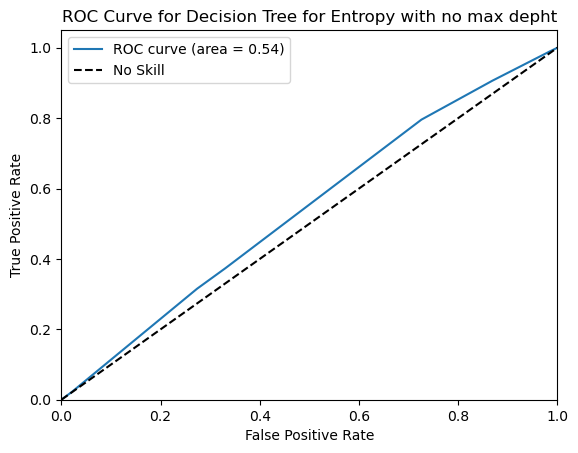

In [99]:
# Calculate ROC curve for Decision Tree Antropy with no max depht
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba2) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree for Entropy with no max depht')
plt.legend()
plt.show()

In [240]:
# Train a Decition Tree (Gini) with no max depht 3 
model25=gini_model.fit(X_train, y_train) 
# Predict probabilities on the test set
#y_pred_prob = model_res.predict_proba(X_test_scaled)
y_pred_proba3 = model25.predict_proba(X_test)[:,1]

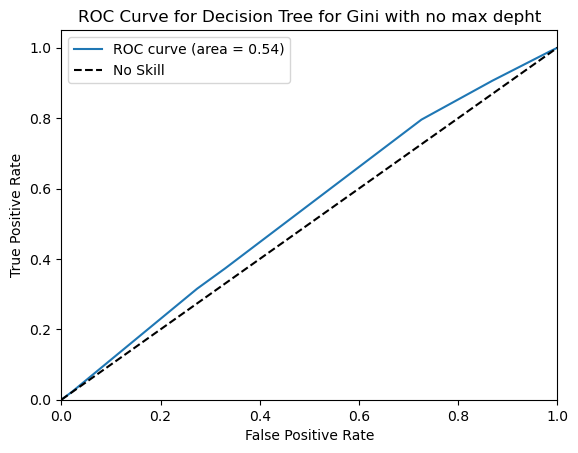

In [241]:
# Calculate ROC curve for Decision Tree , Gini  with no max depht
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba2) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree for Gini with no max depht')
plt.legend()
plt.show()

# Evaluation and Conclusion

Four models were evaluated on the dataset. The multilinear model showed less promising results with an R-squared of 42% and an R-score of less than 1%, indicating it is not a good fit for the dataset. This model was used solely for pre-testing, recognizing that its use of continuous variables could pose issues for Logistic Regression, which typically requires a binary dependent variable. Consequently, this model cannot be considered or included in this study. Therefore, the most convincing revelation is that this dataset is not suitable for multilinear regression analysis. As for determining which model performs better than another, it ultimately remains at the discretion of the reader, given that the results for both Random Forest and Decision Tree models are quite similar. For instance, the ROC score for the Decision Tree is 0.54, whereas it is 0.51 for the Random Forest. Similarly, the specificity is 28% for the Random Forest and 27% for the Decision Tree. From a statistical standpoint, however, the Random Forest holds a slight edge due to its F1-score exceeding 80%. This suggests that the Random Forest model can achieve high precision and recall simultaneously when predicting Amazon Sales status. Indeed, both Random Forest and Decision Tree models appear suitable for assessing this type of dataset. Overall, the study's results did not provide undeniable evidence favoring one model over another, indicating there is room for improvement in future analysis for this type of dataset.om for inprovement.
status. 